In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
from lightgbm import LGBMClassifier
print('Library Loaded')

Library Loaded


In [2]:
data = ('/content/heart.csv')


In [3]:
df=pd.read_csv(data)
df.shape

(374, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
cols= df.columns
cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
print("# rows in dataset{0}".format(len(df)))
print("-----------------------------------------")

for col in cols:
  print("# rows in {1} with ZERO value: {0}".format(len(df[df[col]==0]),col))

# rows in dataset374
-----------------------------------------
# rows in age with ZERO value: 0
# rows in sex with ZERO value: 104
# rows in cp with ZERO value: 166
# rows in trestbps with ZERO value: 0
# rows in chol with ZERO value: 0
# rows in fbs with ZERO value: 314
# rows in restecg with ZERO value: 193
# rows in thalach with ZERO value: 0
# rows in exang with ZERO value: 244
# rows in oldpeak with ZERO value: 129
# rows in slope with ZERO value: 26
# rows in ca with ZERO value: 216
# rows in thal with ZERO value: 4
# rows in target with ZERO value: 174


In [8]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


****Visualization****

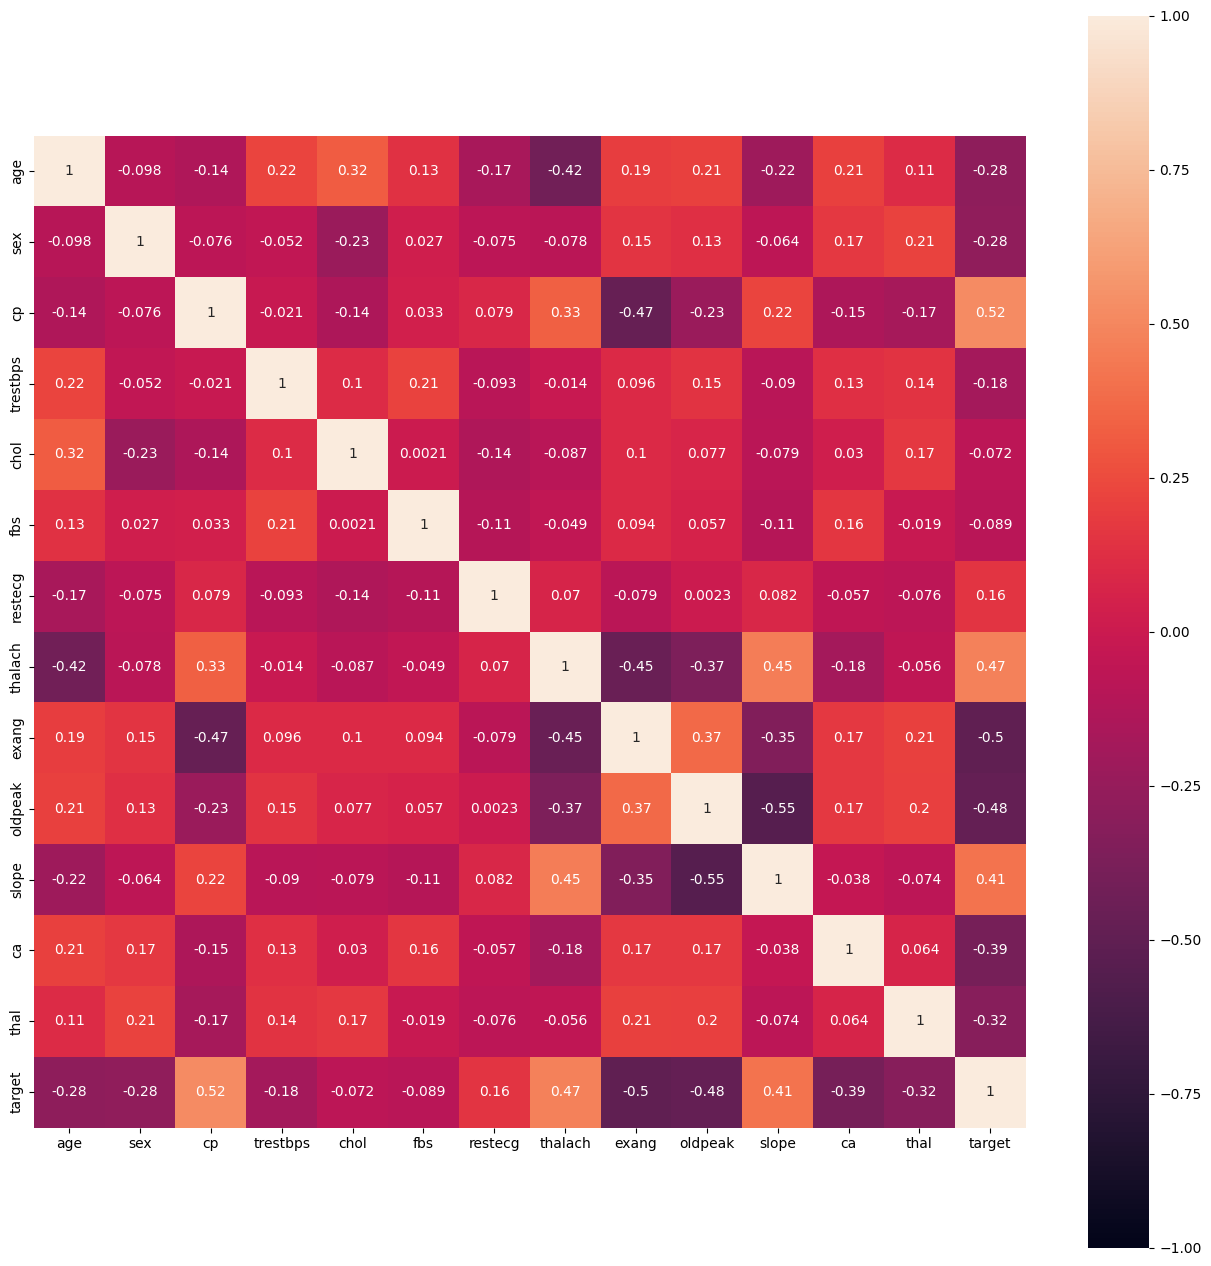

In [9]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (16, 16))


sns.heatmap(corrmat, vmax = 1, square = True, annot = True, vmin=-1)
plt.show()

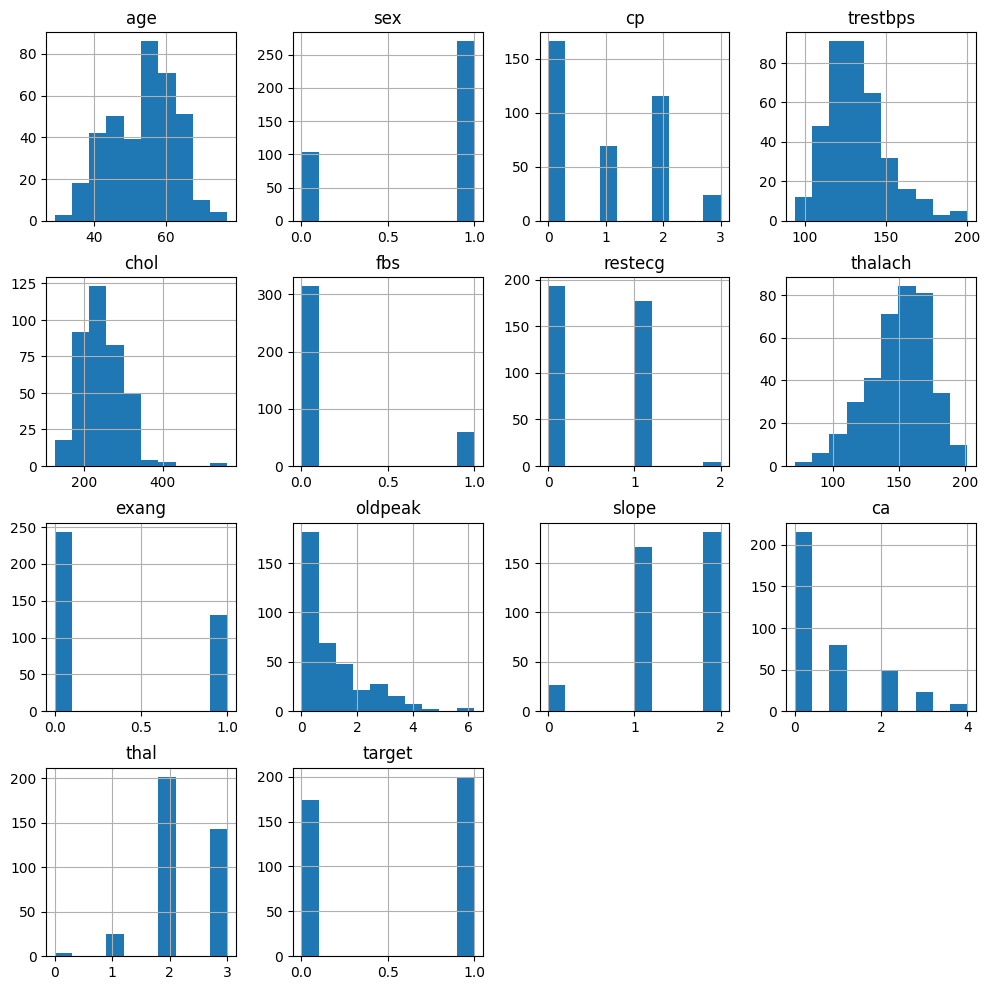

In [10]:
df.hist(figsize=(12,12))
plt.show()

<Axes: xlabel='sex', ylabel='age'>

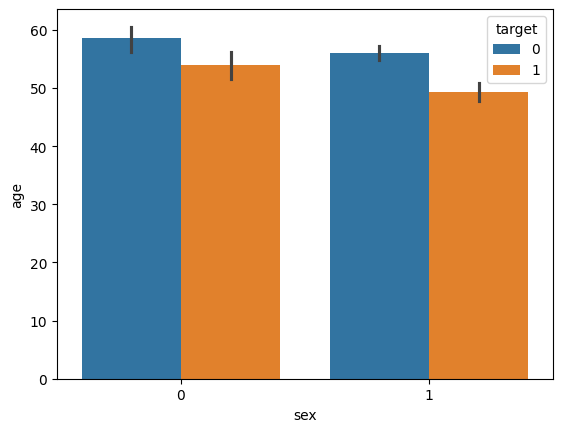

In [11]:
sns.barplot(x='sex',y='age',hue="target",data=df)

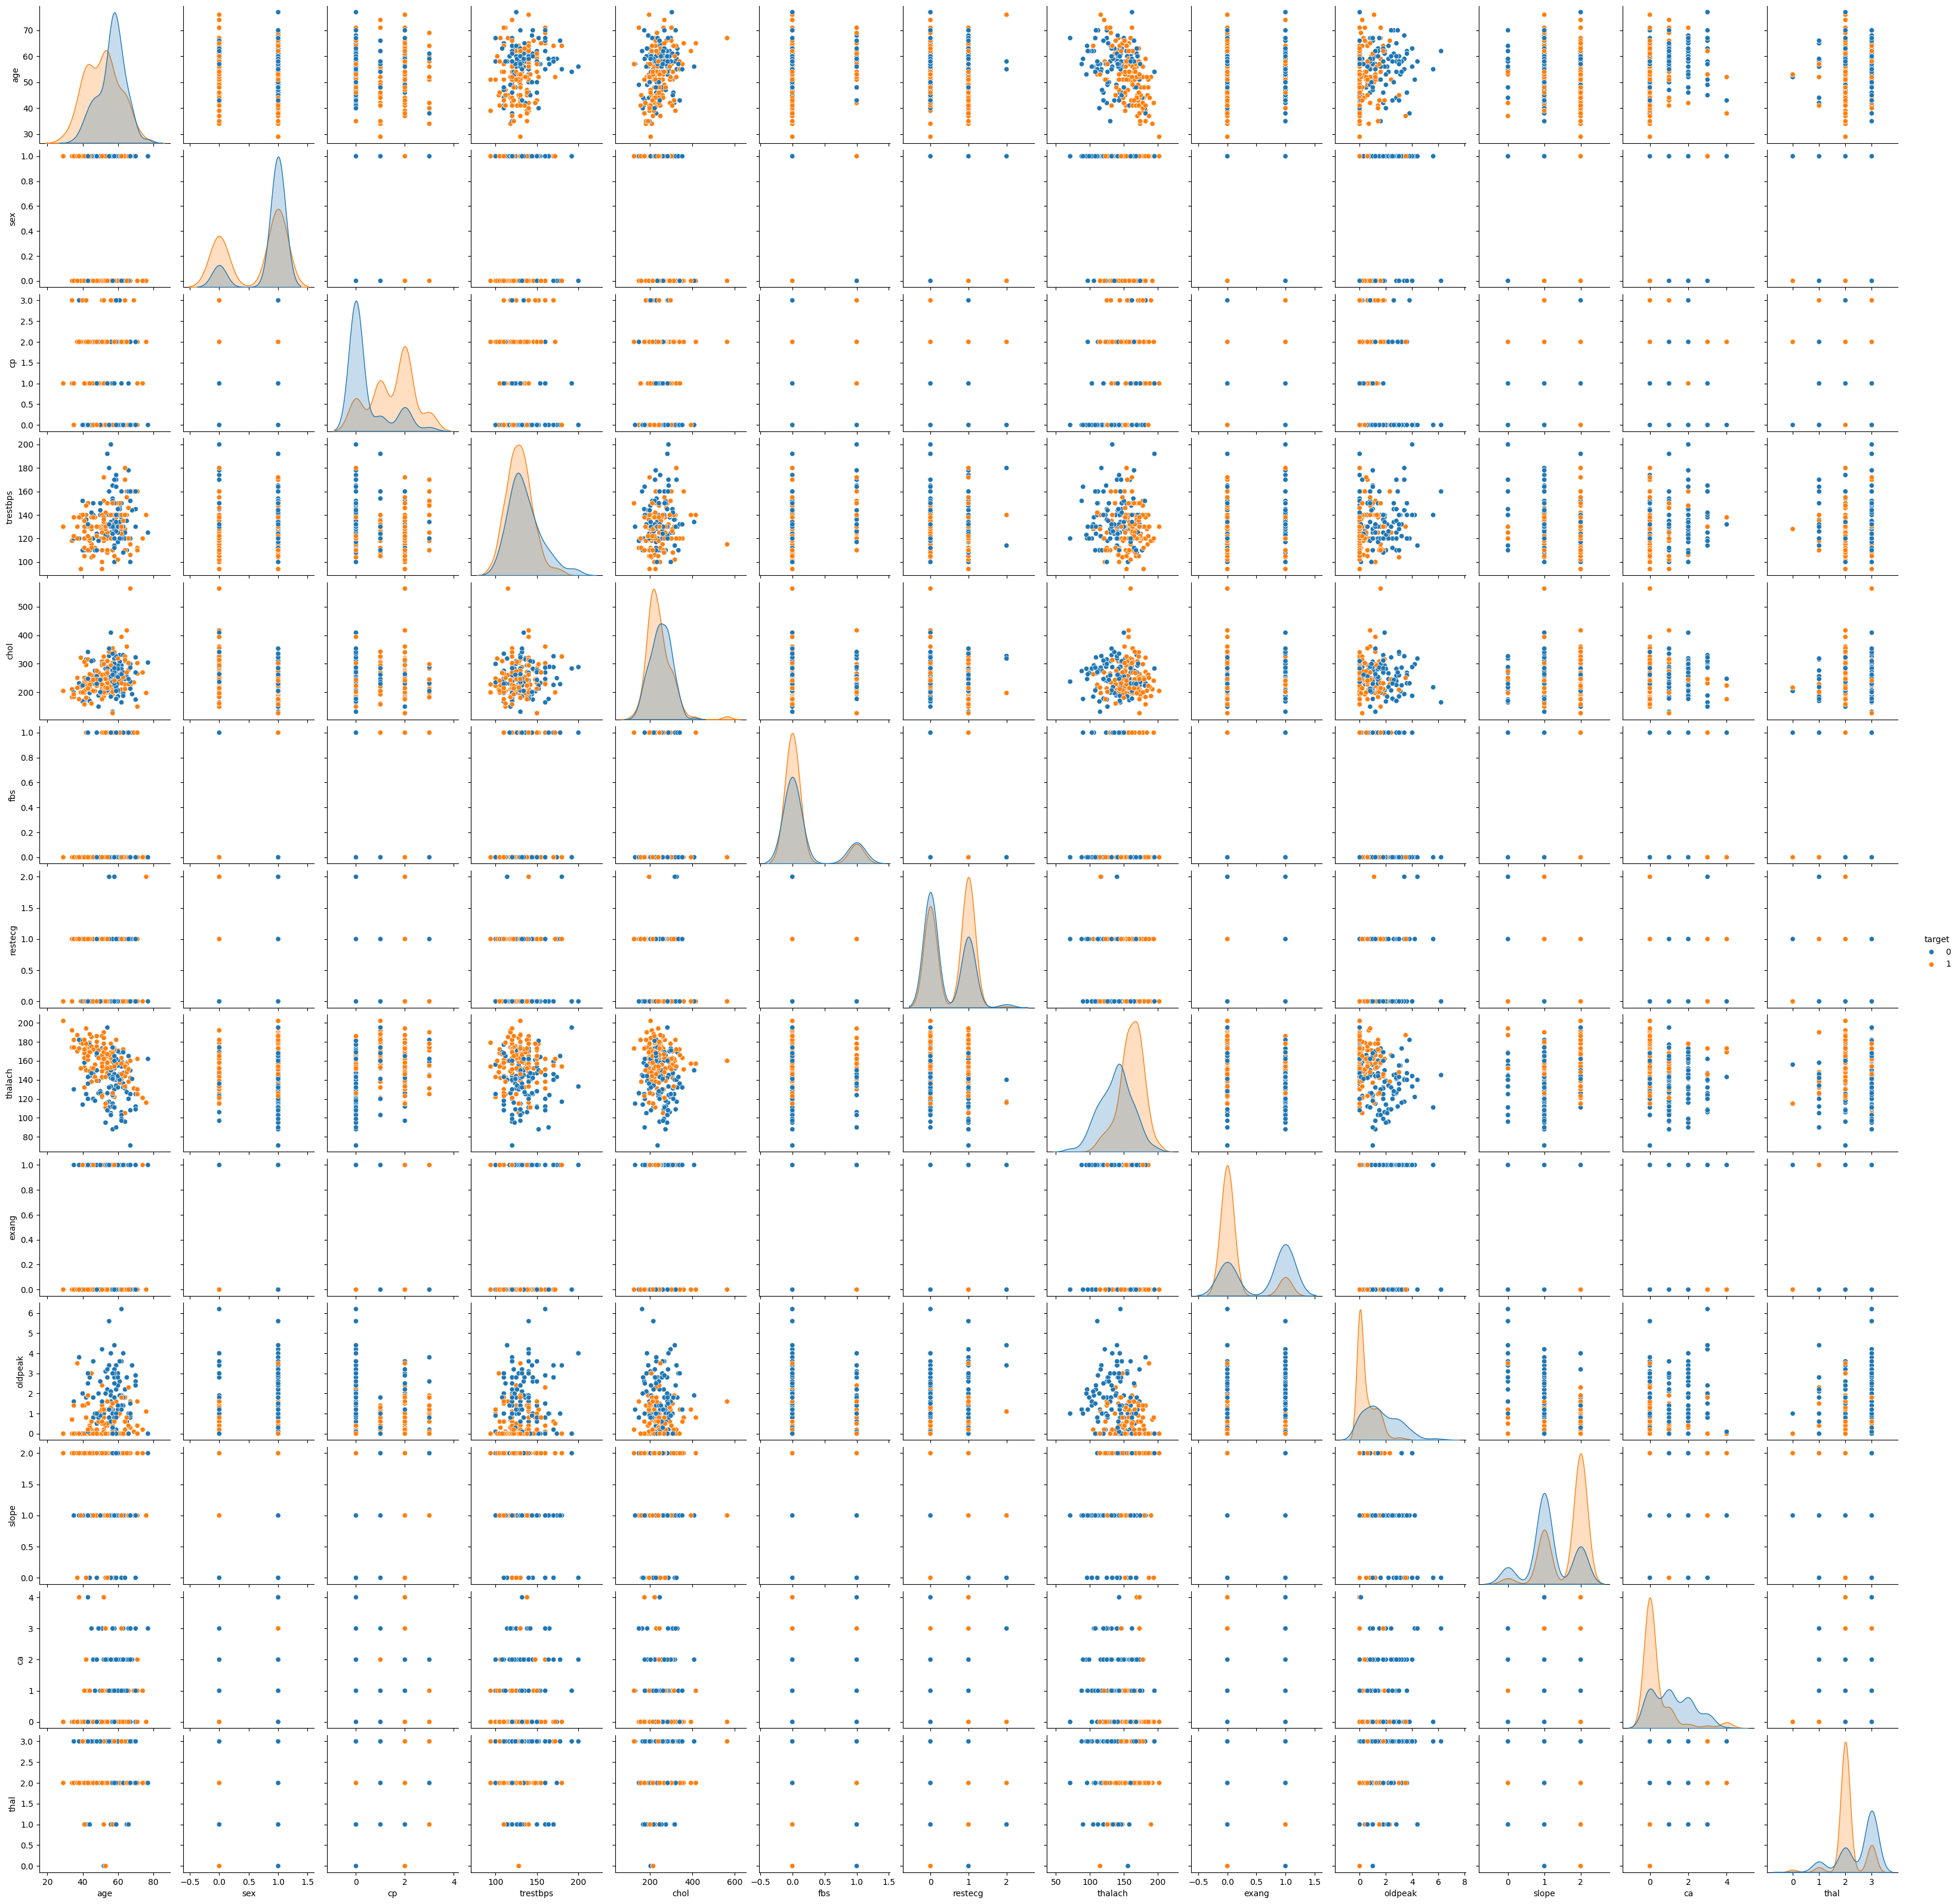

In [12]:
sns.pairplot(df,hue='target',)

In [13]:
X=df.drop('target', axis=1)
from sklearn.manifold import TSNE
import time
time_start=time.time()

df_tsne= TSNE(random_state=10). fit_transform(X)
print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 2.525019884109497 seconds


In [14]:
df_tsne

array([[-6.42760696e+01,  9.04467106e+00],
       [-8.35752792e+01, -4.55441761e+00],
       [-1.08570305e+02, -2.33242359e+01],
       [-3.95574532e+01,  6.21209145e+01],
       [ 7.71377869e+01,  2.19043636e+01],
       [ 8.64945030e+00, -5.52649155e+01],
       [ 1.20264168e+02, -7.92092037e+00],
       [ 8.46456604e+01, -2.37050285e+01],
       [ 7.74544048e+00, -3.47382431e+01],
       [ 7.07680740e+01,  1.12215710e+01],
       [-1.42007935e+02, -8.85854816e+00],
       [ 1.27136307e+02,  5.09750032e+00],
       [-6.00470657e+01,  3.70651588e+01],
       [ 9.19632187e+01,  1.24112606e+01],
       [-7.85153275e+01, -2.24603832e-01],
       [-6.00470657e+01,  3.70651588e+01],
       [ 1.02534111e+02, -6.21657944e+00],
       [ 5.38826714e+01,  1.36168766e+01],
       [-1.61975632e+01, -1.44772301e+01],
       [-7.03460083e+01,  1.58008814e+01],
       [-1.01356857e+02, -3.71286774e+00],
       [-5.46730309e+01, -3.28543396e+01],
       [-6.00986786e+01, -1.92114792e+01],
       [-1.

In [15]:
import matplotlib.patheffects as PathEffects
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes=len(np.unique(colors))
    palette= np.array (sns.color_palette("deep", num_classes))
    # create a scatter plot.
    f=plt.figure(figsize=(8, 8))
    ax =plt.subplot (aspects=' equal')
    sc=ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype (np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
     # add the labels for each digit corresponding to the Label
    txts = []
    for i in range(num_classes):
      # Position of each label at median of data points.
      xtext, ytext = np.median(x[colors == i, :], axis=0)
      txt = ax.text(xtext, ytext, str(i), fontsize=24)
      txt.set_path_effects([
          PathEffects. Stroke (linewidth=5, foreground="w"),
          PathEffects. Normal()])
      txts.append(txt)
    return f, ax, sc, txts

In [16]:
def fashion_scatter(x, labels):
    plt.figure(figsize=(8,8))
    scatter = plt.scatter(x[:,0], x[:,1], c=labels, cmap="tab10", alpha=0.6)
    plt.gca().set_aspect("equal")
    plt.colorbar(scatter, ticks=range(10))
    plt.title("Fashion MNIST t-SNE Projection")
    plt.show()

**FEATURE ENGINEERING**


In [17]:
df.target.value_counts()

,count
target,
1,200
0,174


In [18]:
print("# rows in dataset{0}".format(len(df)))
print("-----------------------------------------")

for col in cols:
  print("# rows in {1} with ZERO value: {0}".format(len(df[df[col]==0]),col))

# rows in dataset374
-----------------------------------------
# rows in age with ZERO value: 0
# rows in sex with ZERO value: 104
# rows in cp with ZERO value: 166
# rows in trestbps with ZERO value: 0
# rows in chol with ZERO value: 0
# rows in fbs with ZERO value: 314
# rows in restecg with ZERO value: 193
# rows in thalach with ZERO value: 0
# rows in exang with ZERO value: 244
# rows in oldpeak with ZERO value: 129
# rows in slope with ZERO value: 26
# rows in ca with ZERO value: 216
# rows in thal with ZERO value: 4
# rows in target with ZERO value: 174


In [19]:
X = df.drop('target',axis=1) # predictor feature coloumns
y = df.target

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.10, random_state = 10)

print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test Labels :',len(y_test))

Training Set : 336
Test Set : 38
Training labels : 336
Test Labels : 38


In [20]:
from sklearn.impute import SimpleImputer


fill = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill.fit_transform(X_train)
X_test = fill.transform(X_test)



**MODEL BUILDING AND EVALUATION**

In [21]:

def FitModel(X_train,y_train,X_test,y_test, algo_name, algorithm, gridSearchParams,cv):
    np.random.seed(10)


    grid =GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_result=grid.fit(X_train, y_train)
    best_params=grid_result.best_params_
    pred=grid_result.predict(X_test)
    cm=confusion_matrix(y_test, pred)
   #metrics-grid_result.gr
    print(pred)
    #pickle.dump(grid_result, open (algo_name, 'wb'))
    print('Best Params:',best_params)
    print('Classification Report:',classification_report(y_test, pred))
    print('Accuracy Score:'+str(accuracy_score (y_test, pred)))
    print('Confusion Matrix: \n', cm)

**LOGISTIC REGRESSION**

In [22]:
# Create regularization penalty space
penalty = ['l1', 'l2']   # <-- fixed (letter L)

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Important: LogisticRegression needs solver that supports l1 (like liblinear or saga)
model = LogisticRegression(solver='liblinear', max_iter=500)

FitModel(X_train, y_train, X_test, y_test, 'Logistic Regression', model, hyperparameters, cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1
 1]
Best Params: {'C': np.float64(2.7825594022071245), 'penalty': 'l1'}
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.62      0.71        16
           1       0.77      0.91      0.83        22

    accuracy                           0.79        38
   macro avg       0.80      0.77      0.77        38
weighted avg       0.80      0.79      0.78        38

Accuracy Score:0.7894736842105263
Confusion Matrix: 
 [[10  6]
 [ 2 20]]


**XGBOOST**

In [23]:
param={
             'n_estimators':[100, 500, 1000, 1500, 2000],
              'max_depth' :[2,3,4,5,6,7],
       'learning_rate': np.arange(0.01,0.1,0.01).tolist()
       }
FitModel(X_train,y_train,X_test,y_test, 'XGBoost', XGBClassifier(), param, cv=5)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0
 1]
Best Params: {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 500}
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.88      0.95      0.91        22

    accuracy                           0.89        38
   macro avg       0.90      0.88      0.89        38
weighted avg       0.90      0.89      0.89        38

Accuracy Score:0.8947368421052632
Confusion Matrix: 
 [[13  3]
 [ 1 21]]


In [24]:
param = {
    'n_estimators': [100, 500, 1000, 1500, 2000],  # fixed key name
    'max_depth': [2, 3, 4, 5, 6, 7],
}

FitModel(X_train, y_train, X_test, y_test,
         'Random Forest',
         RandomForestClassifier(),
         param,
         cv=5)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0
 1]
Best Params: {'max_depth': 7, 'n_estimators': 500}
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.91      0.91      0.91        22

    accuracy                           0.89        38
   macro avg       0.89      0.89      0.89        38
weighted avg       0.89      0.89      0.89        38

Accuracy Score:0.8947368421052632
Confusion Matrix: 
 [[14  2]
 [ 2 20]]


In [25]:
param={
              'C': [0.1, 1, 100, 1000],
             'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
      }
FitModel(X_train,y_train,X_test,y_test, 'SVC', SVC(),param, cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0
 1]
Best Params: {'C': 100, 'gamma': 0.005}
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.69      0.79        16
           1       0.81      0.95      0.88        22

    accuracy                           0.84        38
   macro avg       0.86      0.82      0.83        38
weighted avg       0.85      0.84      0.84        38

Accuracy Score:0.8421052631578947
Confusion Matrix: 
 [[11  5]
 [ 1 21]]


**CORRECTING THE MISTAKE**

In [26]:
print("# rows in dataset{0}".format(len(df)))
print("-----------------------------------------")

for col in cols:
  print("# rows in {1} with ZERO value: {0}".format(len(df.loc[df[col]==0]),col))



# rows in dataset374
-----------------------------------------
# rows in age with ZERO value: 0
# rows in sex with ZERO value: 104
# rows in cp with ZERO value: 166
# rows in trestbps with ZERO value: 0
# rows in chol with ZERO value: 0
# rows in fbs with ZERO value: 314
# rows in restecg with ZERO value: 193
# rows in thalach with ZERO value: 0
# rows in exang with ZERO value: 244
# rows in oldpeak with ZERO value: 129
# rows in slope with ZERO value: 26
# rows in ca with ZERO value: 216
# rows in thal with ZERO value: 4
# rows in target with ZERO value: 174


In [27]:
final_cols=cols
final_cols=list(final_cols)
final_cols.remove('sex')
final_cols.remove('target')
final_cols.remove("age")
final_cols

['cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [28]:
X=df.drop('target',axis=1) #predictor feature coloumns
y = df.target
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.10, random_state = 10)
print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test Labels:',len(y_test))

Training Set : 336
Test Set : 38
Training labels : 336
Test Labels: 38


In [29]:
from sklearn.impute import SimpleImputer

# create imputer (replace missing 0 values with mean)
fill = SimpleImputer(missing_values=0, strategy="mean")

# fit on train and transform both train & test
X_train = fill.fit_transform(X_train[final_cols])
X_test = fill.transform(X_test[final_cols])


In [30]:
print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test Labels :',len(y_test))

Training Set : 336
Test Set : 38
Training labels : 336
Test Labels : 38


**REFITTING THE MODEL**

**RANDOM FOREST**

In [31]:
param={
              'n_estimators': [100, 500, 1000, 1500,2000],
    'max_depth': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
      }
FitModel(X_train,y_train,X_test,y_test, 'Random Forest', RandomForestClassifier(),param, cv=5)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0
 1]
Best Params: {'max_depth': 5, 'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.91      0.91      0.91        22

    accuracy                           0.89        38
   macro avg       0.89      0.89      0.89        38
weighted avg       0.89      0.89      0.89        38

Accuracy Score:0.8947368421052632
Confusion Matrix: 
 [[14  2]
 [ 2 20]]


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 175.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils

**SVC**

In [32]:
param={
              'C': [0.1, 1, 100, 1000],
             'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
      }
FitModel(X_train,y_train,X_test,y_test, 'SVC', SVC(),param, cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0
 1]
Best Params: {'C': 1000, 'gamma': 0.001}
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.83      0.86      0.84        22

    accuracy                           0.82        38
   macro avg       0.81      0.81      0.81        38
weighted avg       0.82      0.82      0.81        38

Accuracy Score:0.8157894736842105
Confusion Matrix: 
 [[12  4]
 [ 3 19]]


In [33]:
# Create regularization penalty space
penalty = ['l1', 'l2']   # <-- fixed (letter L)

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)


FitModel(X_train, y_train, X_test, y_test, 'Logistic Regression', model, hyperparameters, cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1
 1]
Best Params: {'C': np.float64(1.0), 'penalty': 'l2'}
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.62      0.71        16
           1       0.77      0.91      0.83        22

    accuracy                           0.79        38
   macro avg       0.80      0.77      0.77        38
weighted avg       0.80      0.79      0.78        38

Accuracy Score:0.7894736842105263
Confusion Matrix: 
 [[10  6]
 [ 2 20]]


**XGBOOST**

In [34]:
param = {
    'n_estimators': [100, 500, 1000, 1500, 2000],
    'max_depth': [2, 3, 4, 5, 6, 7],
    'learning_rate': np.arange(0.01, 0.1, 0.01).tolist()
}

FitModel(X_train, y_train, X_test, y_test, 'XGBoost', XGBClassifier(), param, cv=5)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0
 1]
Best Params: {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 2000}
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.88      0.95      0.91        22

    accuracy                           0.89        38
   macro avg       0.90      0.88      0.89        38
weighted avg       0.90      0.89      0.89        38

Accuracy Score:0.8947368421052632
Confusion Matrix: 
 [[13  3]
 [ 1 21]]


**BALANCING THE DATASET**

In [35]:
X=df.drop('target', axis=1)
y = df.target
y.value_counts()

,count
target,
1,200
0,174


In [36]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res_OS, Y_res_OS = sm.fit_resample(X, y)
pd.Series(Y_res_OS).value_counts()

,count
target,
0,200
1,200


In [37]:
print(cols)
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [38]:
X_res_OS=pd.DataFrame(X_res_OS, columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target'])
Y_res_OS=pd.DataFrame(Y_res_OS, columns=['target'])

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X_res_OS,Y_res_OS, test_size =0.10, random_state = 10)
print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test Labels :',len(y_test))

Training Set : 360
Test Set : 40
Training labels : 360
Test Labels : 40


In [40]:
print(final_cols)
type(X_train)

['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


pandas.core.frame.DataFrame

In [41]:
from sklearn.impute import SimpleImputer

# impute with mean all readings
fill = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill.fit_transform(X_train[final_cols])
X_test = fill.transform(X_test[final_cols])   # use transform instead of fit_transform for test set

print('Training Set :', len(X_train))
print('Test Set :', len(X_test))
print('Training labels :', len(y_train))
print('Test Labels :', len(y_test))


Training Set : 360
Test Set : 40
Training labels : 360
Test Labels : 40


**REFITTING THE MODEL**

**RANDOM FOREST**

In [42]:
param = {
                 'n_estimators': [100, 500, 1000, 1500, 2000],
    'max_depth': [2, 3, 4, 5, 6, 7],

          }

FitModel(X_train, y_train, X_test, y_test, 'Random Forest', RandomForestClassifier(), param, cv=5)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0
 1 0 1]
Best Params: {'max_depth': 7, 'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.81      0.76      0.79        17

    accuracy                           0.82        40
   macro avg       0.82      0.82      0.82        40
weighted avg       0.82      0.82      0.82        40

Accuracy Score:0.825
Confusion Matrix: 
 [[20  3]
 [ 4 13]]


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


**svc**

In [43]:
param={
              'C': [0.1, 1, 100, 1000],
             'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
      }
FitModel(X_train,y_train,X_test,y_test, 'SVC', SVC(),param, cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 1 0 1]
Best Params: {'C': 1000, 'gamma': 0.001}
Classification Report:               precision    recall  f1-score   support

           0       0.74      0.87      0.80        23
           1       0.77      0.59      0.67        17

    accuracy                           0.75        40
   macro avg       0.75      0.73      0.73        40
weighted avg       0.75      0.75      0.74        40

Accuracy Score:0.75
Confusion Matrix: 
 [[20  3]
 [ 7 10]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***Future Scope***

**Improved Accuracy** – Future work can involve using more advanced machine learning/deep learning models to improve prediction accuracy.

**Real-Time Prediction** – Integrating the model into mobile or web applications for real-time health monitoring.

**Wearable Device Integration** – Linking with smartwatches and fitness trackers to continuously analyze heart health.

**Larger Dataset** – Using bigger and more diverse datasets for better generalization across populations.

**Explainable AI** – Implementing interpretable models that can explain why a person is at risk, helping doctors in decision-making.

**Early Warning System** – Developing an alert system that warns patients and doctors in advance

**In conclusion**

* The project shows how machine learning can be extremely helpful in accurately predicting heart disease.

* It demonstrates how data-driven strategies can help medical practitioners with early diagnosis and treatment planning.

* For preliminary screening, the prediction model offers an economical and efficient tool.

**The model is useful, but it should not be used in place of medical diagnosis; rather, it should be viewed as an auxiliary tool.**

* With further improvements and real-time integration, this project can contribute significantly to reducing heart disease-related risks and mortality.